In [1]:
%load_ext autoreload
%autoreload 2
import palm_tools
from palm_tools import TrackSets
from palm_tools.analysis import MMDInterUnitAnalysis, MDSAnalysis, MMDInterGroupAnalysis
from palm_tools.post_processing.gratin import Gratin, GratinParameters, GratinAllLengths
from palm_tools.post_processing import StepsAndDiffusion
from palm_tools.post_processing.ts_post_processing import PostProcessingStepSeries
import pandas as pd
import numpy as np
from glob import glob
import os
import shutil
import zarr
import matplotlib.pyplot as plt
print(palm_tools.__version__)
%matplotlib inline

0.1.dev108+g6dd6dfe.d20220808


In [2]:
if "Users" in os.getcwd():
    ORIGINAL_TRACKS_FILES = glob("/Users/hverdier/palm_tools_data/example_files/*.trxyt",recursive=True)
    EXPORT_FOLDER = "/Users/hverdier/palm_tools_data/export_folder"
else:
    # Source files, they're left untouched, only read
    ORIGINAL_TRACKS_FILES = glob("/home/hverdier/example_files/*.trxyt",recursive=True)
    # We copy files in this directory, it's as if they were 'uploaded' there by the user
    EXPORT_FOLDER = "/home/hverdier/export_folder"

if not os.path.exists(EXPORT_FOLDER):
    os.mkdir(EXPORT_FOLDER)
TRACKS_FILES = []
for f in ORIGINAL_TRACKS_FILES:
    tf = os.path.join(EXPORT_FOLDER,os.path.split(f)[-1])
    shutil.copy(f,tf)
    TRACKS_FILES.append(tf)

In [3]:
#TRACKS_FILES = glob("/Users/hverdier/Desktop/brieuc/*/*.txt")
#EXPORT_FOLDER = "/Users/hverdier/Desktop/brieuc_export"
print(TRACKS_FILES)

['/Users/hverdier/palm_tools_data/export_folder/66e67e9052c35e8d.trxyt', '/Users/hverdier/palm_tools_data/export_folder/1d372d16b9d77091.trxyt', '/Users/hverdier/palm_tools_data/export_folder/02e0de7a4caebc82.trxyt', '/Users/hverdier/palm_tools_data/export_folder/10fd51e9edc4d570.trxyt']


In [4]:
index_df = pd.DataFrame.from_dict({
    "file":TRACKS_FILES,
    "arbitrary_condition":[
        "A" if i%2 == 0 else "B" for i, f in enumerate(TRACKS_FILES)
    ]})
index_df.head()

file arbitrary_condition
0  /Users/hverdier/palm_tools_data/export_folder/...                   A
1  /Users/hverdier/palm_tools_data/export_folder/...                   B
2  /Users/hverdier/palm_tools_data/export_folder/...                   A
3  /Users/hverdier/palm_tools_data/export_folder/...                   B

# Création du TrackSets

In [5]:
tss = TrackSets.from_files(TRACKS_FILES,root_folder=EXPORT_FOLDER,index_df=index_df)

In [6]:
ts = tss[0]

# Embeddings avec Gratin

In [7]:
gratin_path = "/Users/hverdier/models/demo"
#gratin_path = "/home/hverdier/Gaia/hecat/hippo/gratin_mmd/"
#Gratin.train_model(export_path=gratin_path,time_delta=0.03)

In [8]:
gt = GratinAllLengths(params=GratinParameters(path=gratin_path))
sd = StepsAndDiffusion()

In [9]:
pps = PostProcessingStepSeries(processing_steps=[gt,sd])

In [10]:
pps.process(tss,force=True)

2022-11-03 13:20:33.303605: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Dropping h cols
Dropping h cols
Dropping h cols
Dropping h cols


In [11]:
from scipy.stats import gaussian_kde
from palm_tools.analysis.analysis_tools.mmd import witness_function

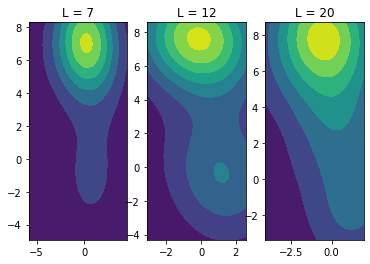

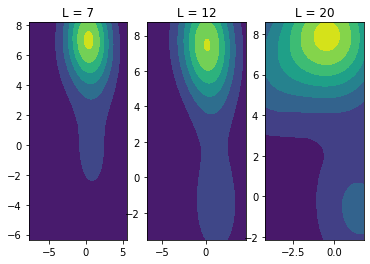

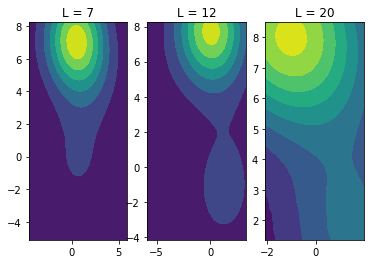

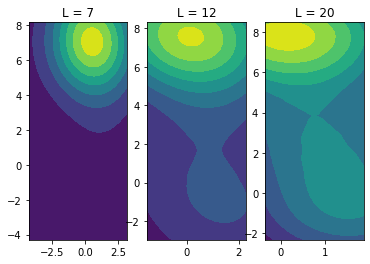

In [12]:
# Visualize latent vectors
for ts in tss:
    fig = plt.figure()
    
    for i, L in enumerate([7,12,20]):
        trajs = ts.trajs_df.loc[ts.trajs_df.L == L]
        X = trajs[["U_1","U_2"]].values
        ax = fig.add_subplot(1,3,i+1)
        xx, yy, _, density, _ = witness_function(X,X,sigma=2)
        ax.contourf(xx,yy,density)
        ax.set_title("L = %d" % L)
        #U = ts.locs.groupby("n")[["U_1","U_2"]].mean().sample(100).values
#plt.legend(markerscale=3)

In [13]:
for ts in tss:
    break

In [14]:
ts.locs.sample(5)

x         y      n  frame        t     log_D         D  \
4958   7.606736  5.722661   4366   1045   1045.0 -3.389960  0.000407   
66566  4.741368  2.253081  54270  13137  13137.0 -3.653682  0.000222   
52339  7.432901  4.655774  43380  10488  10488.0 -2.954638  0.001110   
95964  2.137731  4.047159  78031  18734  18734.0 -2.285468  0.005182   
51917  2.408715  3.403530  43066  10403  10403.0 -2.652811  0.002224   

       est_sigma  n_points  duration  
4958    0.018004        21    1057.0  
66566   0.015809        17   13143.0  
52339   0.029165         9   10490.0  
95964   0.076432         7   18737.0  
51917   0.063109        12   10412.0

In [15]:
ts.trajs_df.columns

Index(['n', 'L', 'h_1', 'h_2', 'h_3', 'h_4', 'h_5', 'h_6', 'h_7', 'h_8', 'h_9',
       'h_10', 'h_11', 'h_12', 'h_13', 'h_14', 'h_15', 'h_16', 'alpha', 'U_1',
       'U_2', 'best_model', 'p_fBM', 'p_LW', 'p_sBM', 'p_OU', 'p_CTRW'],
      dtype='object')

In [16]:
ts.trajs_df.dtypes

n                int64
L                int64
h_1            float64
h_2            float64
h_3            float64
h_4            float64
h_5            float64
h_6            float64
h_7            float64
h_8            float64
h_9            float64
h_10           float64
h_11           float64
h_12           float64
h_13           float64
h_14           float64
h_15           float64
h_16           float64
alpha          float32
U_1            float32
U_2            float32
best_model    category
p_fBM          float32
p_LW           float32
p_sBM          float32
p_OU           float32
p_CTRW         float32
dtype: object

# MMD inter units

In [17]:
RUN_NAME = "example"

mmd = MMDInterUnitAnalysis(track_sets=tss,
    unit_key=["file"], 
    # it is possible to delimit units by a column of the trajectories files (if they have additional information)
    # or to consider a cartesian product of two columns. 
    # example of valid values : ["file","time_bin"], ["file","organelle"], ["organelle"] (spanned across files)
    use_high_dimension=False,
    locs_cols_to_keep = {"x":"mean"},
    n_max_trajs_per_unit=500, # For speed, we never consider more than 500 trajectories per unit
    n_min_trajs_per_unit=150, # For accuracy, we discard units with less than 150 trajectories
    run_name=RUN_NAME)

In [18]:
tss.root_folder

'/Users/hverdier/palm_tools_data/export_folder'

In [19]:
mmd.output_path

'/Users/hverdier/palm_tools_data/export_folder/MMD_inter_units/example'

In [20]:
mmd.process(force_recompute=True)

Saved dict to /Users/hverdier/palm_tools_data/export_folder/MMD_inter_units/example/params.json


In [21]:
mmd.latent_df.size

242760

In [22]:
for ts in tss:
    break

In [23]:
ts.trajs_df.groupby(["n","L"]).first()

h_1       h_2       h_3       h_4       h_5       h_6  \
n     L                                                                
56    9   1.946118  1.859288 -0.179611 -0.811196 -1.317777 -0.737733   
71    9   1.453888  3.342568  1.928414 -1.690647 -1.888805  0.163103   
72    10 -0.462752  1.376618 -0.734024 -1.277834  0.005935  0.590233   
137   11  1.717639  2.638570  0.559084 -1.049830 -1.500272 -1.146517   
142   7   2.137385  2.999132  1.251117 -1.766266 -3.122079 -0.992646   
...            ...       ...       ...       ...       ...       ...   
83099 13 -0.405523  1.663221  1.479237 -1.668656 -0.494702 -0.890797   
83155 7   2.043290  1.023442 -0.493413 -0.457658 -1.069538 -1.194567   
83177 8  -0.052085  1.450502 -0.070146 -0.787487 -0.530743  0.602304   
83238 8   2.559482  2.711824  0.012999  0.037514 -0.612741  0.090219   
83291 7   2.478641  3.320015  2.501287 -2.108029 -3.442969 -0.837099   

               h_7       h_8       h_9      h_10  ...      h_16     alpha  \
n     L                                           ...                       
56    9  -0.148952  0.290119 -0.892004  0.486939  ...  0.339782  0.527137   
71    9  -1.004605  1.269271 -2.759497  2.366122  ...  0.047722  0.509454   
72    10 -2.147841 -0.313310 -2.610162  0.673430  ... -1.057808  0.627733   
137   11  0.052630  1.150047 -1.321636  1.851419  ... -0.446702  0.478315   
142   7  -0.011700  1.637186 -0.560027  2.498473  ...  0.144387  0.520929   
...            ...       ...       ...       ...  ...       ...       ...   
83099 13 -0.804132  0.145606 -1.672988  2.146663  ... -0.900320  0.575170   
83155 7   0.823568  0.287785  1.032906  1.139173  ... -0.413723  0.535924   
83177 8  -1.351848 -0.099467 -1.265877  1.045710  ... -0.437743  0.704709   
83238 8  -0.016747  1.037080 -1.797913  1.120737  ...  0.099108  0.501822   
83291 7  -0.063611  2.021823 -1.038982  3.187314  ...  0.347009  0.517916   

               U_1       U_2  best_model     p_fBM      p_LW     p_sBM  \
n     L                                                                  
56    9  -1.546970  7.623091        CTRW  0.042417  0.001741  0.053380   
71    9   0.719309  6.514616        CTRW  0.000857  0.000132  0.007037   
72    10  0.278495 -3.214053        CTRW  0.000686  0.000036  0.002368   
137   11 -0.451064  7.991570        CTRW  0.002973  0.000191  0.013875   
142   7  -0.098388  7.354497        CTRW  0.001215  0.000265  0.010317   
...            ...       ...         ...       ...       ...       ...   
83099 13  2.163353 -0.334597        CTRW  0.002649  0.000226  0.050670   
83155 7  -5.228890  5.770625          OU  0.338967  0.018285  0.144248   
83177 8   1.096030 -0.988632        CTRW  0.023502  0.003831  0.052769   
83238 8  -0.616167  5.909852        CTRW  0.004591  0.000265  0.010502   
83291 7   0.823193  7.136736        CTRW  0.000186  0.000053  0.003787   

              p_OU    p_CTRW  
n     L                       
56    9   0.049106  0.853357  
71    9   0.001310  0.990664  
72    10  0.000952  0.995958  
137   11  0.004268  0.978693  
142   7   0.001594  0.986608  
...            ...       ...  
83099 13  0.001921  0.944534  
83155 7   0.401111  0.097389  
83177 8   0.027425  0.892473  
83238 8   0.013251  0.971392  
83291 7   0.000255  0.995720  

[2909 rows x 25 columns]

In [24]:
tss.root_folder

'/Users/hverdier/palm_tools_data/export_folder'

In [25]:
MMDInterUnitAnalysis.from_params(export_folder=tss.root_folder,run_name=RUN_NAME,tss=tss)

In [26]:
# Dossier où sont stockés les résultats
# tss.root_folder / MMD_inter_groups / mmd.run_name 
print(mmd.output_path)

/Users/hverdier/palm_tools_data/export_folder/MMD_inter_units/example


In [27]:
# fichiers exportés :
glob(os.path.join(mmd.output_path,"*"))

['/Users/hverdier/palm_tools_data/export_folder/MMD_inter_units/example/p_value.zip',
 '/Users/hverdier/palm_tools_data/export_folder/MMD_inter_units/example/D_sigma.zip',
 '/Users/hverdier/palm_tools_data/export_folder/MMD_inter_units/example/D_bootstrap.zip',
 '/Users/hverdier/palm_tools_data/export_folder/MMD_inter_units/example/units.json',
 '/Users/hverdier/palm_tools_data/export_folder/MMD_inter_units/example/groups',
 '/Users/hverdier/palm_tools_data/export_folder/MMD_inter_units/example/params.json',
 '/Users/hverdier/palm_tools_data/export_folder/MMD_inter_units/example/p_val',
 '/Users/hverdier/palm_tools_data/export_folder/MMD_inter_units/example/D_true',
 '/Users/hverdier/palm_tools_data/export_folder/MMD_inter_units/example/latent_df.csv',
 '/Users/hverdier/palm_tools_data/export_folder/MMD_inter_units/example/D_true.zip',
 '/Users/hverdier/palm_tools_data/export_folder/MMD_inter_units/example/D_null']

In [28]:
mmd._D_true.shape

(4, 4, 20)

In [29]:
mmd._D_null[2,1]

array([-0.00055281])

In [30]:
mmd._D_true[2,1]

array([ 1.33056868e-03,  1.20708312e-03,  9.11523991e-04,  1.14537912e-03,
        9.35027329e-04,  5.65662189e-04,  1.15828358e-03,  2.23024950e-04,
        7.38644558e-04,  1.90574620e-03,  1.10820711e-03,  2.07458175e-03,
        9.15455277e-04,  5.40977099e-04, -7.29663651e-07,  2.27029252e-04,
        1.80546469e-03,  7.98029449e-05,  3.63200385e-04,  1.67052435e-04])

(array([3., 3., 2., 1., 3., 4., 1., 0., 1., 2.]),
 array([-7.29663651e-07,  2.06801478e-04,  4.14332619e-04,  6.21863760e-04,
         8.29394901e-04,  1.03692604e-03,  1.24445718e-03,  1.45198833e-03,
         1.65951947e-03,  1.86705061e-03,  2.07458175e-03]),
 <BarContainer object of 10 artists>)

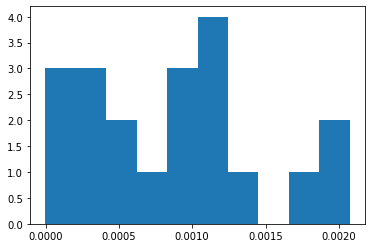

In [31]:
#plt.hist(mmd._D_null[2,1],bins=10)
plt.hist(mmd._D_true[2,1],bins=10)

In [32]:
# Il faut regarder les fonctions "_load()" des différentes classes d'analyses pour voir comment lire les fichiers qu'elles exportent
# par ex :
mmd._p_val

array([[1.   , 0.025, 0.025, 0.025],
       [0.025, 1.   , 0.025, 0.025],
       [0.025, 0.025, 1.   , 0.025],
       [0.025, 0.025, 0.025, 1.   ]])

In [33]:
zarr.load("/Users/hverdier/palm_tools_data/export_folder/MMD_inter_units/example/p_value.zip")

array([[  nan, 0.064, 0.001, 0.001],
       [0.064,   nan, 0.119, 0.001],
       [0.001, 0.119,   nan, 0.322],
       [0.001, 0.001, 0.322,   nan]])

In [34]:
# -> OK, les p-values ont bien été stockées et on peut les lire

In [35]:
for key, unit in mmd.units.items():
    break

In [36]:
unit

{'file': '/Users/hverdier/palm_tools_data/export_folder/10fd51e9edc4d570.trxyt'}

In [37]:
mmd.latent_df.sample(4)

n   L       h_1       h_2       h_3       h_4       h_5       h_6  \
881   26187   9  0.363305  2.294458  1.591987 -2.311217 -2.572532 -1.910674   
36     1097   7  1.648949  2.339597  1.271079 -1.968347 -2.614970 -1.134896   
229    6765  15  1.980902  2.615177  1.895203 -1.163154 -0.437727 -0.721868   
2170  61198   8 -0.513623 -0.126454  1.026302 -1.077608 -0.524660 -1.566746   

           h_7       h_8  ...        t     log_D         D  est_sigma  \
881  -0.515501  0.313068  ...   6324.0 -2.584207  0.002605   0.041359   
36   -0.186167  0.901542  ...    253.0 -3.105005  0.000785   0.037235   
229  -0.053685  1.327911  ...   1628.0 -2.982662  0.001041   0.031273   
2170 -0.081190 -0.829638  ...  14781.0 -1.691363  0.020353   0.072659   

      n_points  duration                                               file  \
881          9    6332.0  /Users/hverdier/palm_tools_data/export_folder/...   
36           7     259.0  /Users/hverdier/palm_tools_data/export_folder/...   
229         15    1642.0  /Users/hverdier/palm_tools_data/export_folder/...   
2170         8   14788.0  /Users/hverdier/palm_tools_data/export_folder/...   

      arbitrary_condition  unit  traj_ID  
881                     A     3    17994  
36                      A     3    15573  
229                     A     3    16139  
2170                    A     3    19953  

[4 rows x 40 columns]

In [38]:
pd.read_csv("/Users/hverdier/palm_tools_data/export_folder/MMD_inter_units/example/latent_df.csv")

Unnamed: 0      n   L       h_1       h_2       h_3       h_4       h_5  \
0              0     63   9  1.010392  2.946148  2.346593 -2.590131 -2.969108   
1              1     72   7  1.524720  1.761242  1.946277 -1.502578 -2.658366   
2              2    144  22  0.401657  1.804630  2.545321 -2.192113 -1.143842   
3              3    144  50  1.579205  2.078706  1.804325 -2.040661 -0.164231   
4              4    211   8  2.882183  2.797885  0.990547 -1.221976 -2.175724   
...          ...    ...  ..       ...       ...       ...       ...       ...   
6064        2904  83099  13 -0.405523  1.663221  1.479237 -1.668656 -0.494702   
6065        2905  83155   7  2.043290  1.023442 -0.493413 -0.457658 -1.069538   
6066        2906  83177   8 -0.052085  1.450502 -0.070146 -0.787487 -0.530743   
6067        2907  83238   8  2.559482  2.711824  0.012999  0.037514 -0.612741   
6068        2908  83291   7  2.478641  3.320015  2.501287 -2.108029 -3.442969   

           h_6       h_7  ...        t     log_D         D  est_sigma  \
0    -1.057501 -0.861557  ...     53.0 -3.272126  0.000534   0.031619   
1    -1.744368  0.614263  ...     60.0 -2.689572  0.002044   0.064027   
2    -1.711132 -0.090239  ...    106.0 -3.094710  0.000804   0.030363   
3    -2.083222  0.255794  ...    106.0 -3.094710  0.000804   0.030363   
4    -0.817759  0.186972  ...    175.0 -2.897075  0.001267   0.056375   
...        ...       ...  ...      ...       ...       ...        ...   
6064 -0.890797 -0.804132  ...  19946.0 -2.558354  0.002765   0.029245   
6065 -1.194567  0.823568  ...  19957.0 -2.079879  0.008320   0.117126   
6066  0.602304 -1.351848  ...  19963.0 -1.975675  0.010576   0.031108   
6067  0.090219 -0.016747  ...  19976.0 -2.272262  0.005342   0.080637   
6068 -0.837099 -0.063611  ...  19993.0 -3.811961  0.000154   0.015613   

      n_points  duration                                               file  \
0            9      61.0  /Users/hverdier/palm_tools_data/export_folder/...   
1            7      66.0  /Users/hverdier/palm_tools_data/export_folder/...   
2           50     155.0  /Users/hverdier/palm_tools_data/export_folder/...   
3           50     155.0  /Users/hverdier/palm_tools_data/export_folder/...   
4            8     182.0  /Users/hverdier/palm_tools_data/export_folder/...   
...        ...       ...                                                ...   
6064        13   19958.0  /Users/hverdier/palm_tools_data/export_folder/...   
6065         7   19963.0  /Users/hverdier/palm_tools_data/export_folder/...   
6066         8   19970.0  /Users/hverdier/palm_tools_data/export_folder/...   
6067         8   19983.0  /Users/hverdier/palm_tools_data/export_folder/...   
6068         7   19999.0  /Users/hverdier/palm_tools_data/export_folder/...   

      arbitrary_condition  unit  traj_ID  
0                       B     0     5158  
1                       B     0     5160  
2                       B     0     5166  
3                       B     0     5166  
4                       B     0     5171  
...                   ...   ...      ...  
6064                    A     3    20595  
6065                    A     3    20596  
6066                    A     3    20597  
6067                    A     3    20598  
6068                    A     3    20599  

[6069 rows x 41 columns]

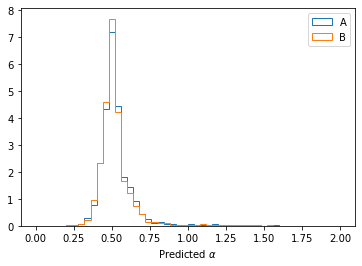

In [39]:
for condition, df in mmd.latent_df.groupby('n').sample(1).groupby("arbitrary_condition"):
    plt.hist(df["alpha"],label=condition,bins=50,range=(0,2),density=True,histtype="step")
plt.xlabel("Predicted $\\alpha$")
plt.legend()

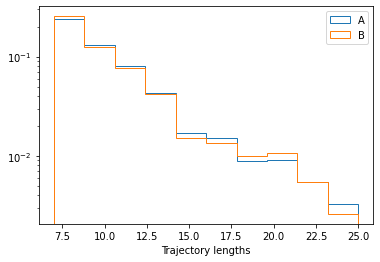

In [40]:
for condition, df in mmd.latent_df.groupby("n").sample(1).groupby("arbitrary_condition"):
    plt.hist(df["L"],label=condition,range=(7,25),density=True,histtype="step")
plt.xlabel("Trajectory lengths")
plt.yscale("log")
plt.legend()

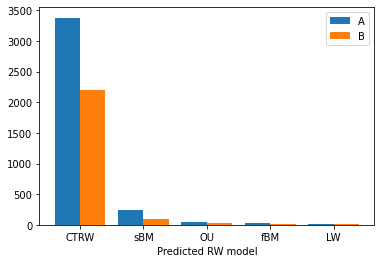

In [41]:
all_models = df.best_model.unique().tolist()
w = .4
for i, (condition, df) in enumerate(mmd.latent_df.groupby("arbitrary_condition")):
    plt.bar(x=np.arange(len(all_models))+(i-.5)*w,height=[(df.best_model == model).sum() for model in all_models],width=w,label=condition)
plt.xticks(ticks=np.arange(len(all_models)),labels=all_models)
plt.xlabel("Predicted RW model")
plt.legend()

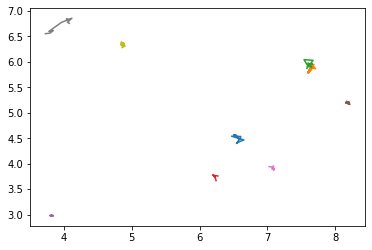

In [42]:
trajs = mmd.find_closest_trajectories(np.array([0.,0.]))
for t in trajs:
    plt.plot(t[:,0],t[:,1])

# MDS based on it

In [43]:
mds = MDSAnalysis(track_sets=tss,run_name=RUN_NAME)

In [44]:
mds.process(force_recompute=True)

100%|██████████| 1000/1000 [00:00<00:00, 2537.56it/s, loss=5.35e-6]


Saved dict to /Users/hverdier/palm_tools_data/export_folder/MDS/example/params.json


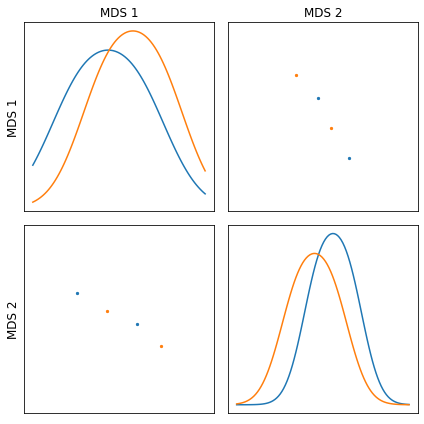

In [45]:
mds.plot_scatter(groupby="arbitrary_condition")

In [46]:
MDSAnalysis.from_params(export_folder=tss.root_folder,run_name="example",tss=tss)

In [47]:
mds.unit_info

n   L       h_1       h_2       h_3       h_4       h_5       h_6  \
0  63   9  1.010392  2.946148  2.346593 -2.590131 -2.969108 -1.057501   
1  23  10  1.964172  2.530523  0.598008 -1.038586 -1.432702 -1.241982   
2   9  13  0.115493  1.404299  0.270990 -1.160955 -0.935690 -1.629945   
3  56   9  1.946118  1.859288 -0.179611 -0.811196 -1.317777 -0.737733   

        h_7       h_8  ...         D  est_sigma  n_points  duration  \
0 -0.861557  1.024147  ...  0.000534   0.031619         9      61.0   
1  0.254620  1.149425  ...  0.003247   0.055952        10      18.0   
2  0.087874  0.225354  ...  0.006020   0.071946        13      25.0   
3 -0.148952  0.290119  ...  0.004331   0.074693         9      18.0   

                                                file  unit  traj_ID  \
0  /Users/hverdier/palm_tools_data/export_folder/...     0     5158   
1  /Users/hverdier/palm_tools_data/export_folder/...     1        3   
2  /Users/hverdier/palm_tools_data/export_folder/...     2    10300   
3  /Users/hverdier/palm_tools_data/export_folder/...     3    15457   

   arbitrary_condition       X_1       X_2  
0                    B  0.037688 -0.012737  
1                    A  0.015171  0.003542  
2                    B -0.013350  0.013050  
3                    A -0.042065  0.026334  

[4 rows x 40 columns]

In [48]:
pd.read_csv("/Users/hverdier/palm_tools_data/export_folder/MDS/example/unit_info.csv",index_col=0)

n   L       h_1       h_2       h_3       h_4       h_5       h_6  \
0  63   9  1.010392  2.946148  2.346593 -2.590131 -2.969108 -1.057501   
1  23  10  1.964172  2.530523  0.598008 -1.038586 -1.432702 -1.241982   
2   9  13  0.115493  1.404299  0.270990 -1.160955 -0.935690 -1.629945   
3  56   9  1.946118  1.859288 -0.179611 -0.811196 -1.317777 -0.737733   

        h_7       h_8  ...         D  est_sigma  n_points  duration  \
0 -0.861557  1.024147  ...  0.000534   0.031619         9      61.0   
1  0.254620  1.149425  ...  0.003247   0.055952        10      18.0   
2  0.087874  0.225354  ...  0.006020   0.071946        13      25.0   
3 -0.148952  0.290119  ...  0.004331   0.074693         9      18.0   

                                                file  unit  traj_ID  \
0  /Users/hverdier/palm_tools_data/export_folder/...     0     5158   
1  /Users/hverdier/palm_tools_data/export_folder/...     1        3   
2  /Users/hverdier/palm_tools_data/export_folder/...     2    10300   
3  /Users/hverdier/palm_tools_data/export_folder/...     3    15457   

   arbitrary_condition       X_1       X_2  
0                    B  0.037688 -0.012737  
1                    A  0.015171  0.003542  
2                    B -0.013350  0.013050  
3                    A -0.042065  0.026334  

[4 rows x 40 columns]

# MMD inter groups

In [49]:
mmd = MMDInterGroupAnalysis(track_sets=tss,
    unit_key=["file"],
    null_mode="mix",
    group_by_keys=["arbitrary_condition"],
    # it is possible to delimit units by a column of the trajectories files (if they have additional information)
    # or to consider a cartesian product of two columns. 
    # example of valid values : ["file","time_bin"], ["file","organelle"], ["organelle"] (spanned across files)
    use_high_dimension=False,
    n_max_bootstraps=250,
    n_max_trajs_per_unit=500, # For speed, we never consider more than 500 trajectories per unit
    n_min_trajs_per_unit=150, # For accuracy, we discard units with less than 150 trajectories
    run_name=RUN_NAME)

In [50]:
mmd.process(force_recompute=True)

Saved dict to /Users/hverdier/palm_tools_data/export_folder/MMD_inter_groups/example/params.json


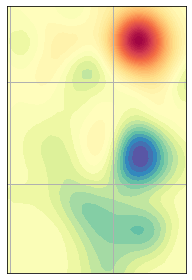

In [51]:
mmd.plot_witness_function({"arbitrary_condition":"A"},{"arbitrary_condition":"B"})

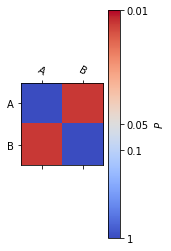

In [52]:
mmd.plot_mosaic()

/Users/hverdier/palm-tools/src/palm_tools/analysis/mmd_analysis.py:587: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.sort_values("distance", inplace=True)
/Users/hverdier/palm-tools/src/palm_tools/analysis/mmd_analysis.py:932: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


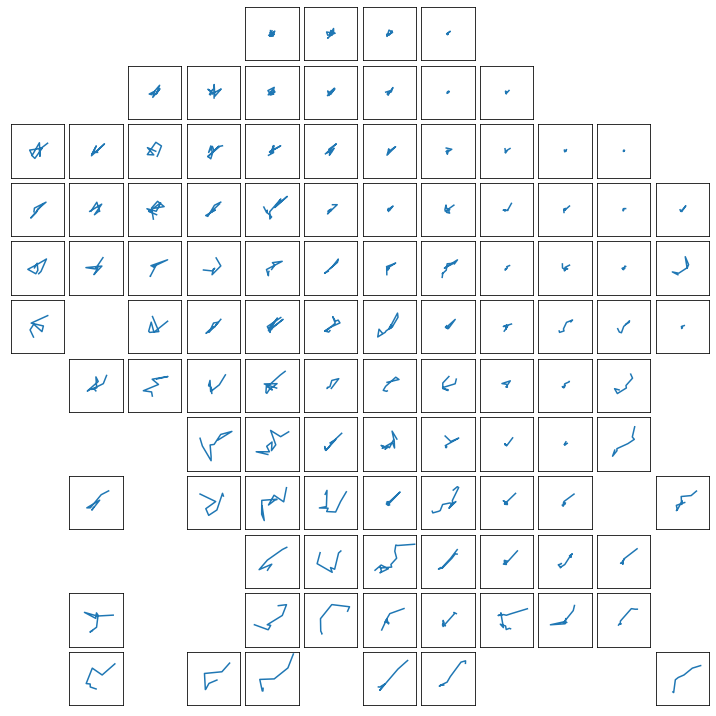

In [53]:
mmd.plot_latent_map()

67 critic_1
133 critic_2


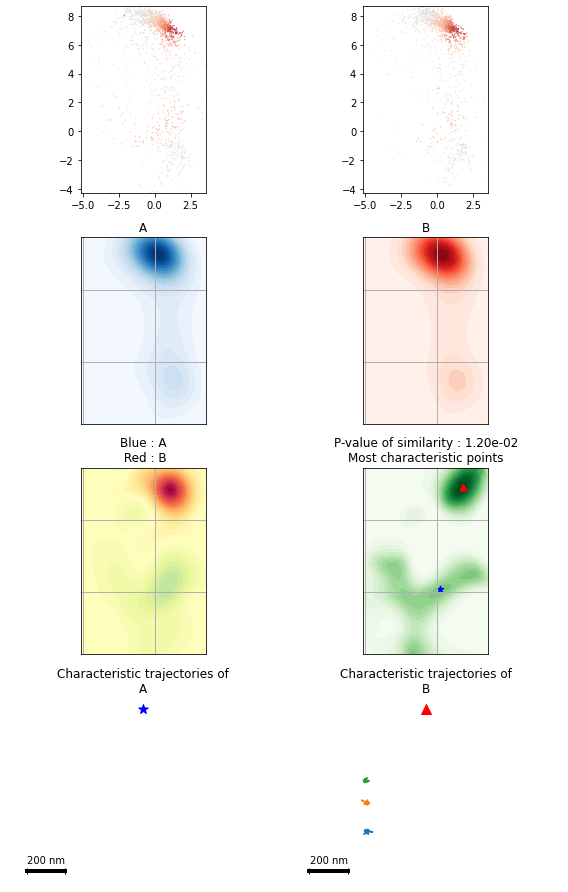

In [54]:
mmd.plot_discriminant_trajs({"arbitrary_condition":"A"},{"arbitrary_condition":"B"})